# Masks : land-sea and relief

The aim of this notebook is to indicate how to read the data from masks. For each geographical zone (North-West (NW) of France and South-East (SE) of France), two different masks are stored in a GRIB file:

* the **land-sea mask**, stored in the ```lsm``` field. The values are binary : 0 for sea and 1 for land.

* the **relief mask**, stored in the ```p3008``` field. The values are in meters.


The spatial resolution is 0.025°. 
These data are constant fields which come from the fine-mesh french weather model called 'AROME'.

Note : When you open a GRIB file with the library xarray, a new associated file of type .idx is created. 

For more information, cf [documentation](https://meteofrance.github.io/meteonet/english/data/land-relief-masks/). 

In [1]:
import meteonet_toolbox.user_configuration 
import xarray as xr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

User is not known. If you experiment some problems with path for library please add the specific path in `user_configuration.py` module


Select the area you want to study :

In [2]:
zone = "SE"
fname = "../../data_samples/masks/%s_masks.grib" % (zone)

Open the GRIB file :

In [3]:
data = xr.open_dataset(fname, engine='cfgrib')

## Simple plots

<IPython.core.display.Javascript object>


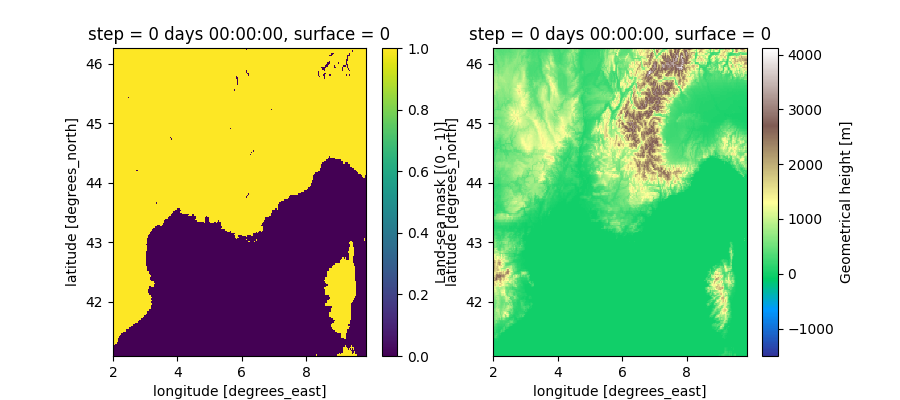

In [4]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

# Plot the land-sea mask
data["lsm"].plot(ax=axs[0])

# Plot the relief mask
vmax = data["p3008"].values.max()
data["p3008"].plot(ax=axs[1], cmap='terrain', vmin=-1500, vmax=vmax)

plt.show()

## Exploring the xarray grid format
Overview of the data and metadata : 

In [ ]:
data

Print information about the coordinates (latitude and longitude):

In [ ]:
coord = 'longitude'
data[coord]

In [ ]:
data[coord].units

In [ ]:
data[coord].values

Example for the land-sea mask:

In [ ]:
data['lsm']

## Plotting the masks with Cartopy

In [ ]:
from meteonet_toolbox.constant import DOMAINS
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
# Coordinates of studied area boundaries
lllat = DOMAINS[zone]['lry']  #lower left latitude
urlat = DOMAINS[zone]['uly']  #upper right latitude
lllon = DOMAINS[zone]['ulx']  #lower left longitude
urlon = DOMAINS[zone]['lrx']  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

In [ ]:
fig = plt.figure()

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
data["lsm"].plot()

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.show()

In [ ]:
fig = plt.figure()

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
vmax = data["p3008"].values.max()
data["p3008"].plot(cmap='terrain', vmin=-1500, vmax=vmax)

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.show()